In [17]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
df = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = df.data.features
y = df.data.targets

# metadata
print(df.metadata)




{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [18]:
# variable information
df.variables

,name,role,type,demographic,description,units,missing_values
0,school,Feature,Categorical,None,student's school (binary: 'GP' - Gabriel Perei...,None,no
1,sex,Feature,Binary,Sex,student's sex (binary: 'F' - female or 'M' - m...,None,no
2,age,Feature,Integer,Age,student's age (numeric: from 15 to 22),None,no
3,address,Feature,Categorical,None,student's home address type (binary: 'U' - urb...,None,no
4,famsize,Feature,Categorical,Other,family size (binary: 'LE3' - less or equal to ...,None,no
5,Pstatus,Feature,Categorical,Other,parent's cohabitation status (binary: 'T' - li...,None,no
6,Medu,Feature,Integer,Education Level,"mother's education (numeric: 0 - none, 1 - pr...",None,no
7,Fedu,Feature,Integer,Education Level,"father's education (numeric: 0 - none, 1 - pr...",None,no
8,Mjob,Feature,Categorical,Occupation,"mother's job (nominal: 'teacher', 'health' car...",None,no
9,Fjob,Feature,Categorical,Occupation,"father's job (nominal: 'teacher', 'health' car...",None,no


In [20]:
import pandas as pd
#task1-1:

df = pd.concat([X, y], axis=1)
df['G3_category'] = pd.cut(df['G3'], bins=[-1, 9, 14, 20], labels=['Low', 'Medium', 'High'])
print(df['G3_category'].value_counts())


G3_category
Medium    418
High      131
Low       100
Name: count, dtype: int64


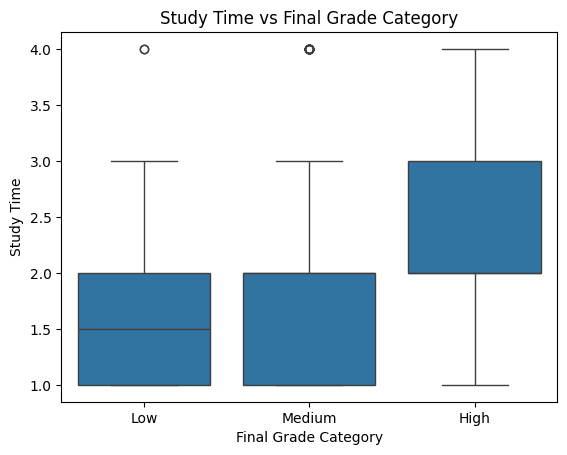

In [22]:
# task1-2:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='G3_category', y='studytime', data=df)
plt.title('Study Time vs Final Grade Category')
plt.xlabel('Final Grade Category')
plt.ylabel('Study Time')
plt.show()

The boxplot shows that students in the "High" performance category generally spend more time studying than those in "Medium" and "Low" categories. The median study time increases with better performance, suggesting a positive relationship between study time and final grades.

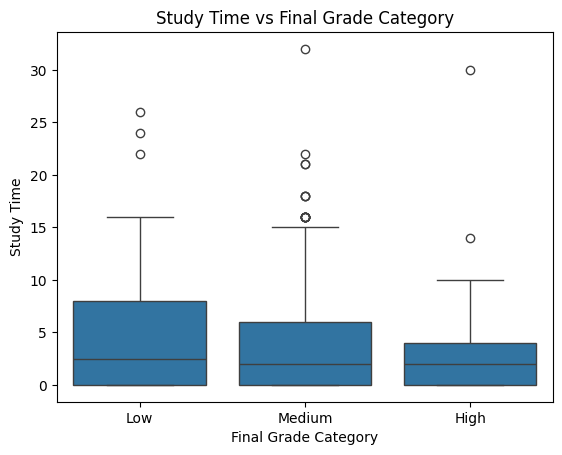

In [23]:
sns.boxplot(x='G3_category', y='absences', data=df)
plt.title('Study Time vs Final Grade Category')
plt.xlabel('Final Grade Category')
plt.ylabel('Study Time')
plt.show()

The plot indicates that students in the "Low" grade category tend to have higher absences compared to the "Medium" and "High" groups. This suggests that frequent absences may negatively impact student performance.



In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

X = df[['studytime', 'absences', 'failures', 'goout']]
y = df['G3_category']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Fit model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Check baseline
print("Baseline category:", le.classes_[0])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Baseline category: High


In [30]:
import numpy as np

predictors = ['studytime', 'absences', 'failures', 'goout']
coef_df = pd.DataFrame(model.coef_, columns=predictors, index=le.classes_)
print(coef_df)
coef_df = pd.DataFrame(model.coef_, columns=predictors, index=le.classes_)
print(coef_df)


        studytime  absences  failures     goout
High     0.372778 -0.042128 -1.186602 -0.040147
Low     -0.365178  0.029685  1.133391  0.074207
Medium  -0.007600  0.012443  0.053211 -0.034060
        studytime  absences  failures     goout
High     0.372778 -0.042128 -1.186602 -0.040147
Low     -0.365178  0.029685  1.133391  0.074207
Medium  -0.007600  0.012443  0.053211 -0.034060


In [31]:
coef = coef_df.loc['High', 'studytime']
odds_ratio = np.exp(coef)
print(f"For each unit increase in study time, the odds of being in 'High' vs 'Low' increase by a factor of {odds_ratio:.2f}")


For each unit increase in study time, the odds of being in 'High' vs 'Low' increase by a factor of 1.45


In [32]:
import numpy as np

# Choose 'High' class row and 'studytime' predictor
coef = coef_df.loc['High', 'studytime']
odds_ratio = np.exp(coef)

print(f"Coefficient for studytime in 'High' vs 'Low': {coef:.4f}")
print(f"Odds Ratio: {odds_ratio:.2f}")


Coefficient for studytime in 'High' vs 'Low': 0.3728
Odds Ratio: 1.45


The coefficient for studytime in the 'High' category (vs 'Low') is positive, which means that as study time increases, the odds of a student being in the 'High' performance group (compared to 'Low') increase.
For example, an odds ratio of 1.5 means that with each unit increase in study time, the odds of being in the 'High' category increase by 50%, assuming other variables are held constant.

Confusion Matrix:
 [[ 0  1 31]
 [ 0  3 12]
 [ 0  2 81]]
Overall Accuracy: 64.62%


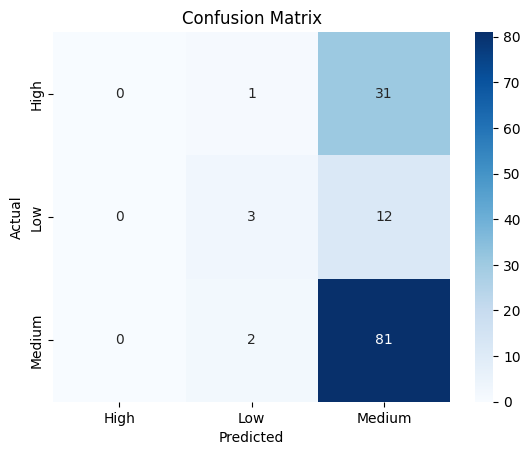

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy*100:.2f}%")

# Optional: Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


- The confusion matrix shows how many observations were correctly or incorrectly classified into each category (Low, Medium, High). The diagonal values represent correct predictions, while the off-diagonal values indicate misclassifications.

- The overall accuracy score shows the percentage of correct predictions made by the model.

- The heatmap provides a visual interpretation of the confusion matrix, helping to identify which categories are most often confused with one another.
A higher number of correct predictions (on the diagonal) and fewer off-diagonal errors indicate a better-performing model.

**Predicting Student Performance Using Multinomial Logistic Regression**

The dataset was used to predict student performance by recoding the final grade (`G3`) into three categories: Low (0-9), Medium (10-14), and High (15-20), with 100 students in Low, 418 in Medium, and 131 in High. A multinomial logistic regression model was trained using `studytime`, `absences`, `failures`, and `goout` as predictors, with `High` as the baseline category. The coefficient for `studytime` was 0.3728, and its odds ratio of **1.45** showed that each unit increase in study time increases the odds of achieving a `High` grade compared to `Low` by 45%. The model's **overall accuracy** was **64.62%**, correctly predicting 65% of the observations. It performed well in predicting the `High` category but struggled to distinguish between `Low` and `Medium`. The results indicate that study time is an important factor in student success, but the model needs further improvement to enhance accuracy, particularly for the `Low` and `Medium` categories.

